In [78]:
import keras
from keras.datasets import mnist
import matplotlib
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
import numpy as np
from keras.utils import to_categorical

In [89]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [91]:
X_train = X_train.reshape(60000, 28 * 28).astype('float32') / 255
X_test = X_test.reshape(10000, 28 * 28).astype('float32') / 255

In [92]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [38]:
digitClassifier = Sequential()
digitClassifier.add(Dense(512, input_dim= 28 * 28, activation='relu'))
digitClassifier.add(Dropout(0.2))
digitClassifier.add(Dense(512, activation='relu'))
digitClassifier.add(Dropout(0.2))
digitClassifier.add(Dense(10, activation='softmax'))

In [39]:
digitClassifier.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [40]:
digitClassifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = digitClassifier.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=2, validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
 - 6s - loss: 0.2653 - accuracy: 0.9196 - val_loss: 0.1038 - val_accuracy: 0.9703
Epoch 2/20
 - 6s - loss: 0.1069 - accuracy: 0.9663 - val_loss: 0.0862 - val_accuracy: 0.9745
Epoch 3/20
 - 6s - loss: 0.0745 - accuracy: 0.9768 - val_loss: 0.0744 - val_accuracy: 0.9790
Epoch 4/20
 - 6s - loss: 0.0560 - accuracy: 0.9816 - val_loss: 0.0726 - val_accuracy: 0.9788
Epoch 5/20
 - 6s - loss: 0.0465 - accuracy: 0.9849 - val_loss: 0.0690 - val_accuracy: 0.9803
Epoch 6/20
 - 6s - loss: 0.0385 - accuracy: 0.9873 - val_loss: 0.0625 - val_accuracy: 0.9818
Epoch 7/20
 - 6s - loss: 0.0354 - accuracy: 0.9880 - val_loss: 0.0756 - val_accuracy: 0.9810
Epoch 8/20
 - 6s - loss: 0.0319 - accuracy: 0.9891 - val_loss: 0.0780 - val_accuracy: 0.9792
Epoch 9/20
 - 6s - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0772 - val_accuracy: 0.9820
Epoch 10/20
 - 6s - loss: 0.0258 - accuracy: 0.9913 - val_loss: 0.0729 - val_accuracy: 0.9835
Epoch 11/20
 - 6s - 

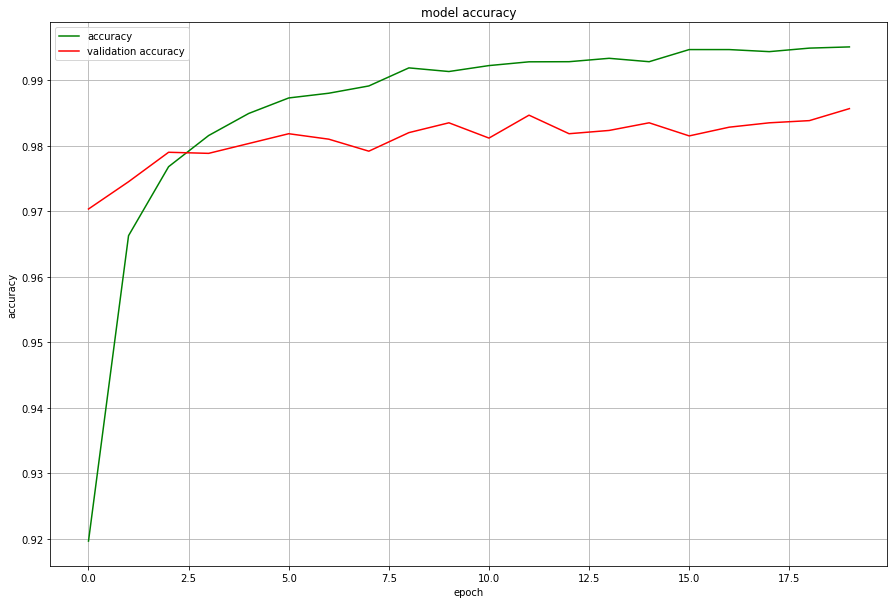

In [42]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'], label="accuracy", color='green')
plt.plot(history.history['val_accuracy'], label="validation accuracy", color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend()

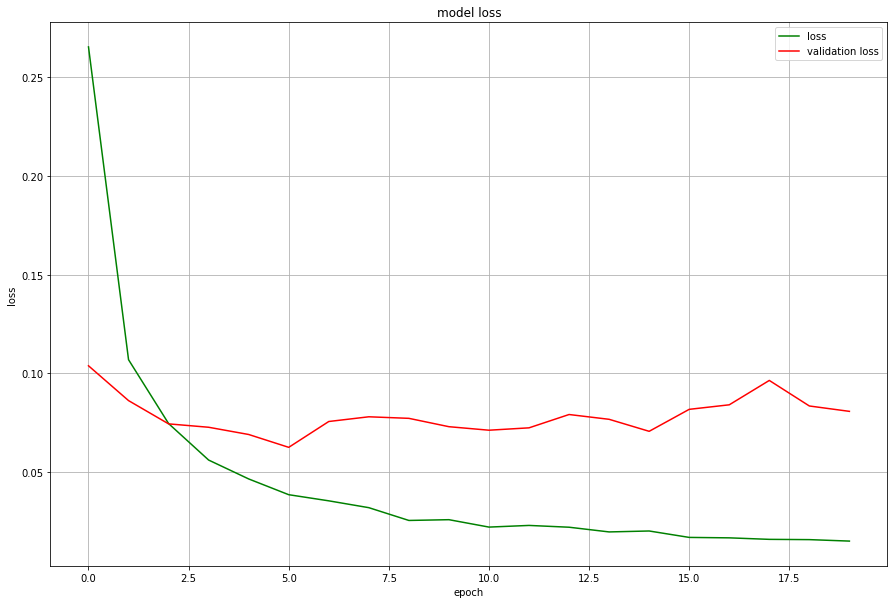

In [43]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'], label="loss", color='green')
plt.plot(history.history['val_loss'], label="validation loss", color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend()

In [44]:
loss, accuracy = digitClassifier.evaluate(X_test, Y_test, verbose=2)

In [45]:
loss

0.07656290980688724

In [46]:
accuracy

0.9819999933242798

In [128]:
def draw(images, texts, columns=1, rows=1):
    fig = plt.figure(figsize=(4 * columns, 4 * rows))

    for i in range(columns * rows):
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.set_title(texts[i])
        ax.set_aspect('equal')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(images[i].reshape(28, 28) * 255)

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_frame_on(False)
    plt.show()

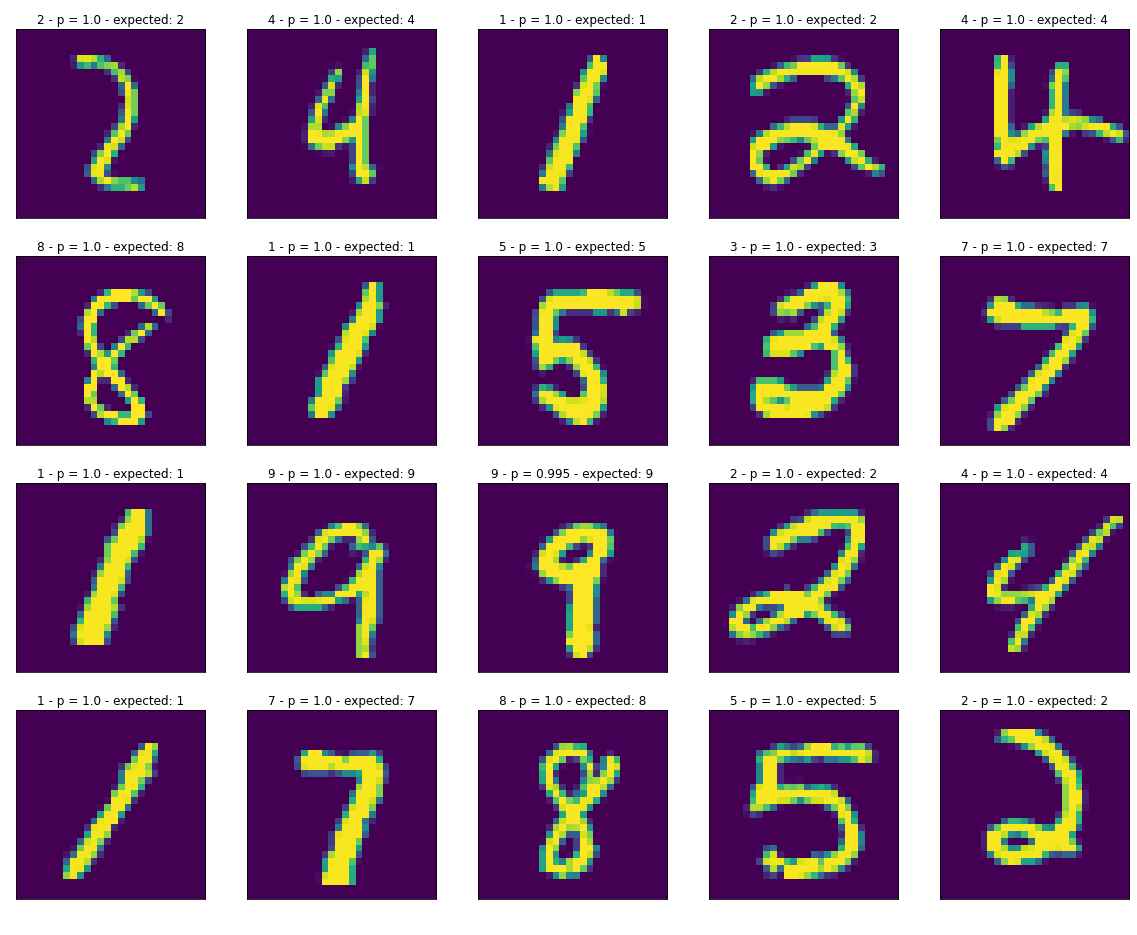

In [131]:
indices = np.random.choice(np.arange(len(X_test)), size=20)
images = X_test[indices]
probs = digitClassifier.predict(images)
predicted_digits = [np.argmax(p) for p in probs]
texts = [f'{predicted_digits[i]} - p = {probs[i][predicted_digits[i]]:.3} - expected: {np.argmax(y_test[indices[i]])}' for i in range(len(indices))]

draw(images, texts, 5, 4)

In [51]:
def add_noise(array:np.ndarray, noise_sigma):
    return np.clip(array + np.random.normal(0, noise_sigma, array.shape), 0, 1)

In [62]:
noisy_train = add_noise(X_train, 0.3)
noisy_test = add_noise(X_test, 0.3)

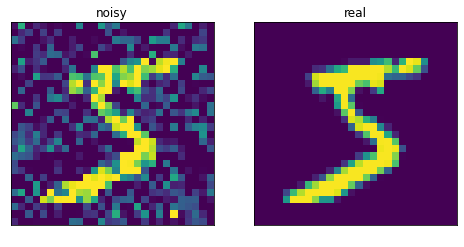

In [134]:
draw([noisy_train[0], X_train[0]], ["noisy", "real"], 2, 1)

In [68]:
autoEncoder = Sequential()
autoEncoder.add(Dense(64, input_dim=28*28, activation='relu'))
autoEncoder.add(Dense(28*28, activation='sigmoid'))
autoEncoder.compile(loss='mse', optimizer='adam')

In [69]:
autoEncoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_11 (Dense)             (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [70]:
autoEncoder.fit(noisy_train, X_train, batch_size=512, epochs=100, validation_split=0.2, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 1s - loss: 0.0849 - val_loss: 0.0569
Epoch 2/100
 - 1s - loss: 0.0472 - val_loss: 0.0399
Epoch 3/100
 - 1s - loss: 0.0360 - val_loss: 0.0325
Epoch 4/100
 - 1s - loss: 0.0298 - val_loss: 0.0275
Epoch 5/100
 - 1s - loss: 0.0255 - val_loss: 0.0240
Epoch 6/100
 - 1s - loss: 0.0225 - val_loss: 0.0212
Epoch 7/100
 - 1s - loss: 0.0199 - val_loss: 0.0191
Epoch 8/100
 - 1s - loss: 0.0182 - val_loss: 0.0176
Epoch 9/100
 - 1s - loss: 0.0168 - val_loss: 0.0164
Epoch 10/100
 - 1s - loss: 0.0157 - val_loss: 0.0154
Epoch 11/100
 - 1s - loss: 0.0148 - val_loss: 0.0146
Epoch 12/100
 - 1s - loss: 0.0140 - val_loss: 0.0139
Epoch 13/100
 - 1s - loss: 0.0134 - val_loss: 0.0133
Epoch 14/100
 - 1s - loss: 0.0128 - val_loss: 0.0128
Epoch 15/100
 - 1s - loss: 0.0123 - val_loss: 0.0124
Epoch 16/100
 - 1s - loss: 0.0119 - val_loss: 0.0120
Epoch 17/100
 - 1s - loss: 0.0115 - val_loss: 0.0117
Epoch 18/100
 - 1s - loss: 0.0112 - val_loss: 0.0114
Epoch

In [71]:
autoEncoder.evaluate(noisy_test, X_test)

10000/10000 [==============================] - 0s 22us/step


0.008324778909236193

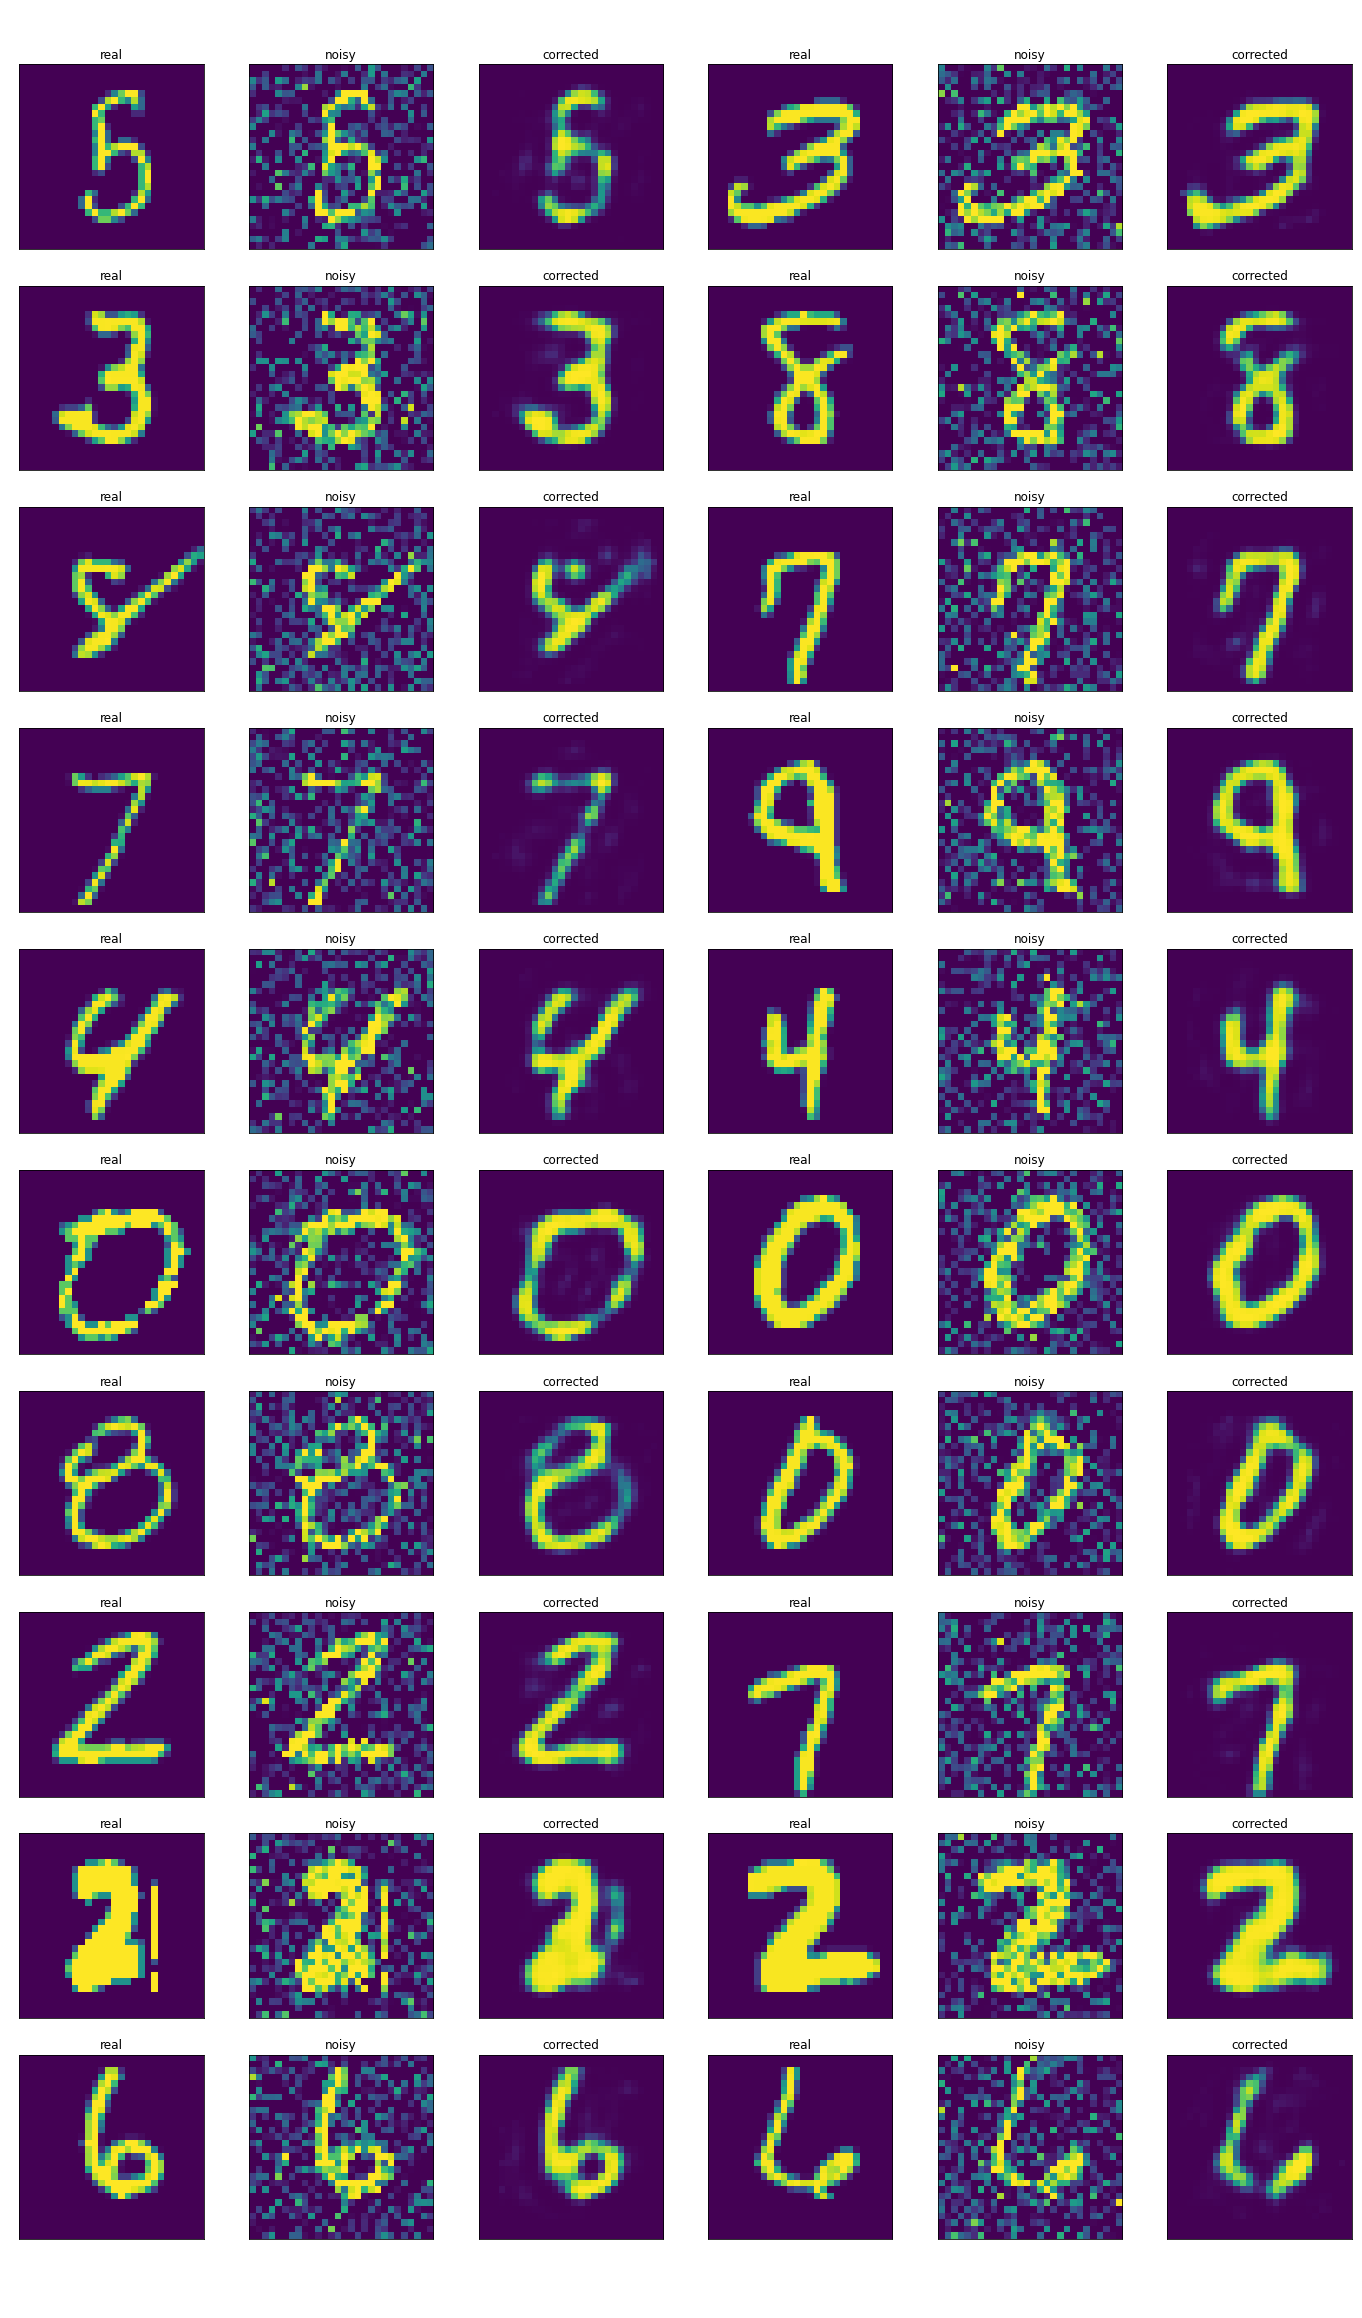

In [144]:
indices = np.random.choice(np.arange(len(X_test)), size=20)
images = np.zeros((20, 3, X_test[0].shape[0]))
images[:,0] = X_test[indices]
images[:,1] = noisy_test[indices]
images[:,2] = autoEncoder.predict(images[:,1])
images = images.reshape(20 * 3, X_test[0].shape[0],)
texts = np.zeros((20, 3), dtype=object)
texts[:,0] = np.array(['real' for _ in range(20)])
texts[:,1] = np.array(['noisy' for _ in range(20)])
texts[:,2] = np.array(['corrected' for _ in range(20)])

texts = texts.reshape(20 * 3)

draw(images, texts, 6, 10)

In [139]:
images.shape

(47040,)